<a href="https://colab.research.google.com/github/Santanukolkata/Data_Science/blob/master/Models/Logistic_Regression/Logistic_Regression_formula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
from tqdm import *
import random
from math import *
import operator

import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing, model_selection

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
Desc="""
5. Number of Instances: 214 
6. Number of Attributes: 10 (including an Id#) plus the class attribute
   -- all attributes are continuously valued
7. Attribute Information:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                  are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps

9. Class Distribution: (out of 214 total instances)
    -- 163 Window glass (building windows and vehicle windows)
       -- 87 float processed  
          -- 70 building windows
          -- 17 vehicle windows
       -- 76 non-float processed
          -- 76 building windows
          -- 0 vehicle windows
    -- 51 Non-window glass
       -- 13 containers
       -- 9 tableware
       -- 29 headlamps
"""
print(Desc)


5. Number of Instances: 214 
6. Number of Attributes: 10 (including an Id#) plus the class attribute
   -- all attributes are continuously valued
7. Attribute Information:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                  are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps

9. Class Distribution: (out of 214 total instances)
    -- 163 Window glass (building windows and vehicle windows)
       -- 87 float processed  
          -- 70 building windows
          -- 17 vehicle windows
       --

In [ ]:
location = r"https://raw.githubusercontent.com/Santanukolkata/Data_Science/master/datasets/glass.csv"

In [ ]:
# load the training data from glass data set
glass = pd.read_csv(location)
print(glass.dtypes)
print(glass.shape)
glass.head()

Id        int64
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object
(214, 11)


,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
# Question: Pretend that we want to predict ri, and our only feature is al. 
# How could we do it using machine learning?

# Answer: We could frame it as a regression problem, and use a linear 
#         regression model with al as the only feature and ri as the 
#         response.

# Question: How would we visualize this model?

# Answer: Create a scatter plot with al on the x-axis and ri on the y-axis, 
#         and draw the line of best fit.

In [ ]:
glass.columns 

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
glass.sort_values ('Al', inplace=True)

glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
21,22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
184,185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
39,40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
38,39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
50,51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


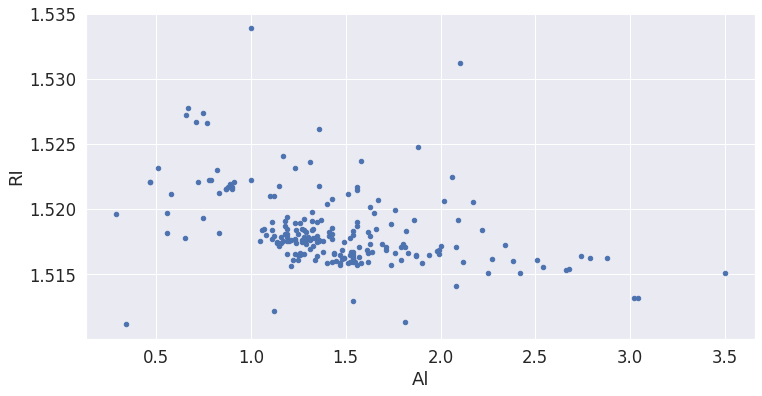

In [ ]:
# Question: How would we draw this plot without using Seaborn?
# scatter plot using Pandas
glass.plot(kind='scatter', x='Al', y='RI', figsize=(12, 6));

In [ ]:
# fit a linear regression model
linreg       = LinearRegression()

feature_cols = ['Al']

X            = glass[feature_cols]
y            = glass.RI

linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# make predictions for all values of X
glass['ri_pred'] = linreg.predict(X)
glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,ri_pred
21,22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227
184,185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103
39,40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
38,39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
50,51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682


In [ ]:
# # plot those predictions connected by a line
# plt.figure(figsize=(12,6))

# plt.plot(glass.al, glass.ri_pred, color='red')
# plt.xlabel('Al')
# plt.ylabel('Predicted RI')

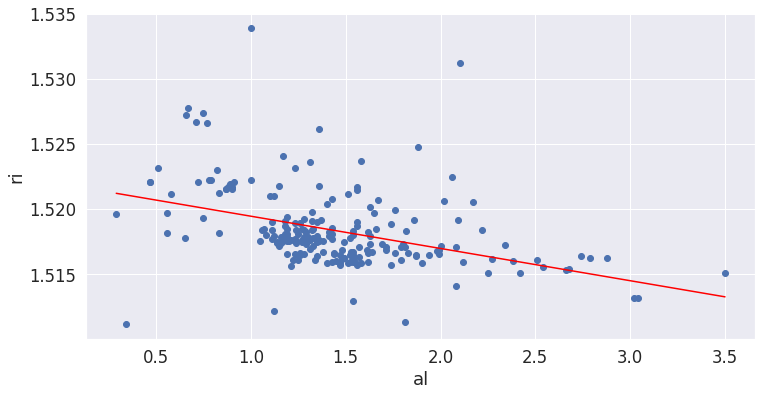

In [ ]:
# put the plots together
plt.figure(figsize=(12,6))

plt.scatter(glass.Al, glass.RI)
plt.plot(glass.Al, glass.ri_pred, color='red')

plt.xlabel('al')
plt.ylabel('ri');

Refresher: interpreting linear regression coefficients
Linear regression equation: $y = \beta_0 + \beta_1.x$

In [ ]:
# compute prediction for al=2 using the equation
linreg.intercept_ + linreg.coef_ * 2

array([1.51699012])

In [ ]:
# compute prediction for al=2 using the predict method
linreg.predict([[2]])

array([1.51699012])

In [ ]:
# examine coefficient for al
for each in zip(feature_cols, linreg.coef_):
    print(each)

('Al', -0.0024776063874696235)


In [ ]:
linreg.coef_

array([-0.00247761])

Interpretation: A 1 unit increase in 'al' is associated with a 0.0025 unit decrease in 'ri'.

#### Predicting a Categorical Response

In [ ]:
# examine glass_type
glass.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [ ]:
glass.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type',
       'ri_pred'],
      dtype='object')

In [ ]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})

glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,ri_pred,household
21,22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0
184,185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1
39,40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
38,39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
50,51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0


Let's change our task, so that we're __predicting household type using al__. 

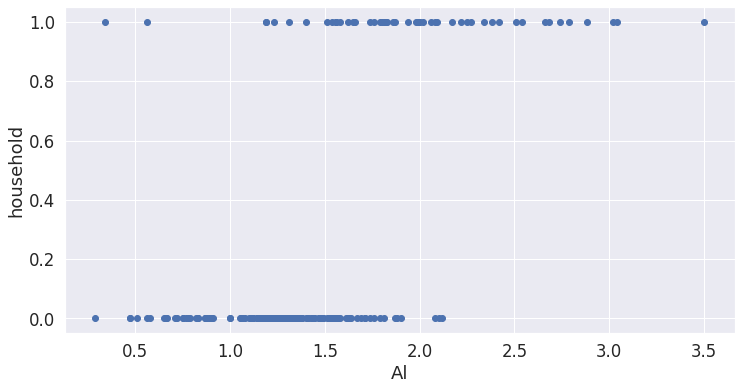

In [ ]:
plt.figure(figsize=(12,6))

plt.scatter(glass.Al, glass.household)

plt.xlabel('Al')
plt.ylabel('household');

Let's draw a regression line, like we did before:

In [ ]:
# fit a linear regression model and store the predictions
feature_cols = ['Al']

X = glass[feature_cols]
y = glass.household

linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,ri_pred,household,household_pred
21,22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495
184,185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436
39,40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283
38,39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283
50,51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236


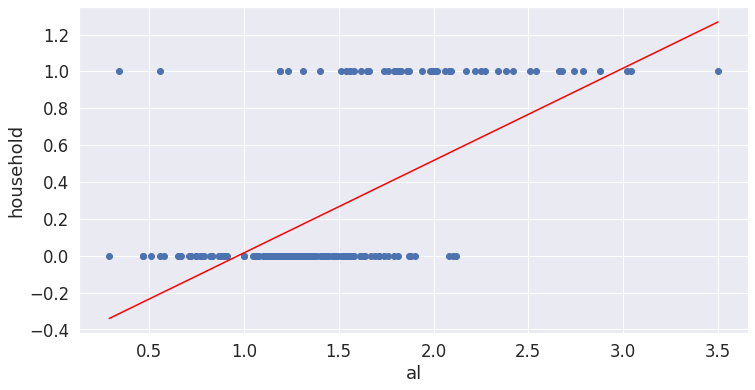

In [ ]:
# scatter plot that includes the regression line
plt.figure(figsize=(12,6))
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred, color='red')

plt.xlabel('al')
plt.ylabel('household');

If al=3, what class do we predict for household? 1

If al=1.5, what class do we predict for household? 0

We predict the 0 class for lower values of al, and the 1 class for higher values of al. 

What's our cutoff value? Around al=2, because that's where the linear regression line crosses 
the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if household_pred >= 0.5, we predict a class of 1, else we predict a class of 0.

#### understanding np.where

In [ ]:
# understanding np.where
nums = np.array([5, 15, 8])

# np.where returns the first value if the condition is True, and 
# the second value if the condition is False
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], dtype='<U5')

back to main code ...

In [ ]:
# transform household_pred to 1 or 0
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,ri_pred,household,household_pred,household_pred_class
21,22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0
184,185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0
39,40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
38,39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
50,51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0


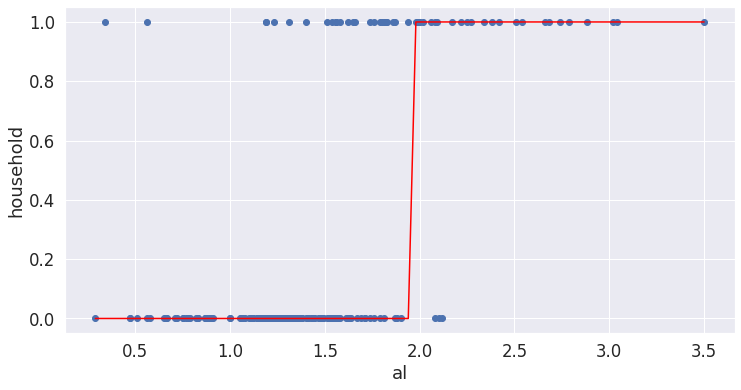

In [ ]:
# plot the class predictions
plt.figure(figsize=(12,6))
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al,    glass.household_pred_class, color='red')

plt.xlabel('al')
plt.ylabel('household');

In [ ]:
# Using Logistic Regression Instead
# Logistic regression can do what we just did:

In [ ]:
logreg = LogisticRegression(solver='lbfgs')

feature_cols = ['Al']

X = glass[feature_cols]
y = glass.household

logreg.fit(X, y)

glass['household_pred_class'] = logreg.predict(X)

In [ ]:
glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,ri_pred,household,household_pred,household_pred_class
21,22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0
184,185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0
39,40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
38,39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
50,51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0


Text(0, 0.5, 'household')

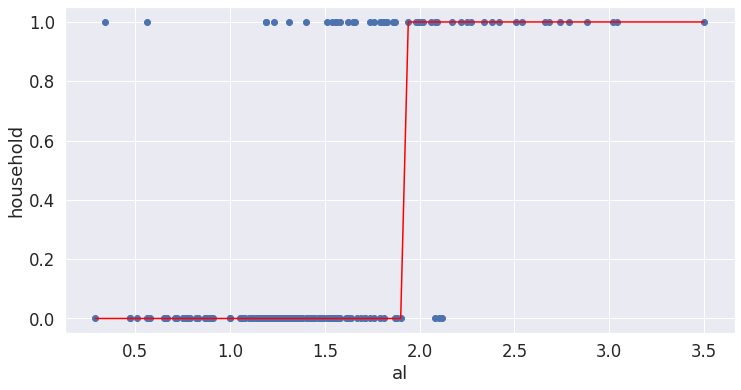

In [ ]:
# plot the class predictions
plt.figure(figsize=(12,6))
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_class, color='red')

plt.xlabel('al')
plt.ylabel('household')

In [ ]:
# What if we wanted the predicted probabilities instead of just the class predictions, 
# to understand how confident we are in a given prediction?

logreg.predict_proba(X)[:3]

- only 3 samples of Al
- first sample 
    - it will calculate
        - y = b0 + b1.x1
        - pass y to sigmoid function
        - sigmoid fn will return {0, 1} - probability
        

In [ ]:
logreg.predict_proba(X)[:15]

array([[0.9939759 , 0.0060241 ],
       [0.99296771, 0.00703229],
       [0.98949363, 0.01050637],
       [0.98949363, 0.01050637],
       [0.98811597, 0.01188403],
       [0.98614074, 0.01385926],
       [0.98614074, 0.01385926],
       [0.98526292, 0.01473708],
       [0.9817376 , 0.0182624 ],
       [0.98117062, 0.01882938],
       [0.98058638, 0.01941362],
       [0.97806663, 0.02193337],
       [0.97738831, 0.02261169],
       [0.9752281 , 0.0247719 ],
       [0.9752281 , 0.0247719 ]])

In [ ]:
#logreg.predict_proba(X)[:, 1]

In [ ]:
# store the predicted probabilites of class 1
glass['household_pred_prob_1'] = logreg.predict_proba(X)[:, 1]
glass['household_pred_prob_0'] = logreg.predict_proba(X)[:, 0]

In [ ]:
glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,ri_pred,household,household_pred,household_pred_class,household_pred_prob,household_pred_prob_1,household_pred_prob_0
21,22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0,0.006024,0.006024,0.993976
184,185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0,0.007032,0.007032,0.992968
39,40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0.010506,0.010506,0.989494
38,39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0.010506,0.010506,0.989494
50,51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0,0.011884,0.011884,0.988116


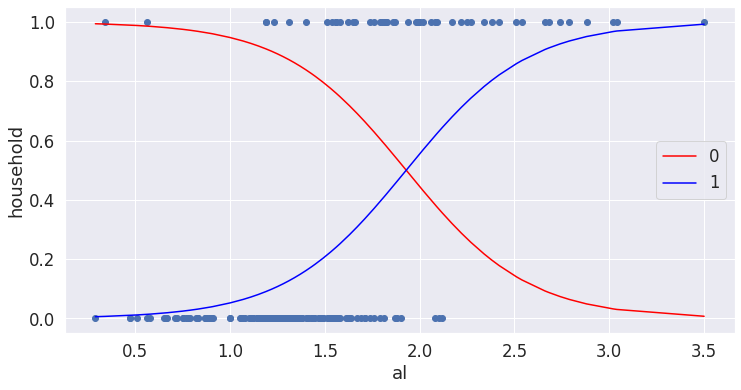

In [ ]:
# plot the predicted probabilities
plt.figure(figsize=(12,6))

plt.scatter(glass.Al, glass.household)

plt.plot(glass.Al, glass.household_pred_prob_0, color='red',label='0')
plt.plot(glass.Al, glass.household_pred_prob_1, color='blue',label='1')
plt.legend()
plt.xlabel('al')
plt.ylabel('household');

In [ ]:
logreg.predict_proba([[1]])

array([[0.94755733, 0.05244267]])

In [ ]:
# examine some example predictions
print (logreg.predict_proba([[1]]))
print (logreg.predict_proba([[2]]))
print (logreg.predict_proba([[3]]))

[[0.94755733 0.05244267]]
[[0.4449707 0.5550293]]
[[0.03435025 0.96564975]]


In [ ]:
linreg.intercept_, linreg.coef_

(-0.4858361691974763, array([0.501177]))

In [ ]:
# what do these coeff mean? are they the same as we saw in 
# linear regression??
logreg.intercept_, logreg.coef_

(array([-6.00934605]), array([[3.11517927]]))

In [ ]:
# The first column indicates the predicted probability of class 0, and 
# the second column indicates the predicted probability of class 1.

__Linear regression:__ continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1.x_1$$

generally,

$$ y = \beta_0 + \beta_1.x_1 + \beta_2.x_2 + \beta_3.x_3 + ... + \beta_k.x_k$$

__Logistic regression:__ log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$log\frac{p}{1−p} = y = \beta_0 + \beta_1.x$$

But how ????

$$y = \beta_0 + \beta_1.x$$

$$ P = logit(\hat{y}) = \frac{1}{1 + e^{-y}}$$

$$ P = \frac{1}{1 + \frac{1}{e^{y}}}$$

$$ P = \frac{e^{y}}{1 + e^{y}}$$

$$ \frac{1}{P} = \frac{1 + e^{y}}{e^{y}}$$

$$ \frac{1}{P} - 1 = \frac{1 + e^{y}}{e^{y}} - 1$$

$$ \frac{1 - P}{P} = \frac{1 }{e^{y}} $$

$$ \frac{P}{1 - P} = e^{y} $$

$$ e^{y} = \frac{P}{1 - P} $$

$$ y = log(\frac{P}{1 - P}) $$

__This is called the logit function.__

Probability is sometimes written as pi:

$$log\frac{\pi}{1 - \pi} = \beta_0 + \beta_1.x$$

$$\frac{\pi}{1 - \pi} = e^{\beta_0 + \beta_1.x}$$

$$\frac{1 - \pi}{\pi} = \frac{1}{e^{\beta_0 + \beta_1.x}}$$

$$\frac{1}{\pi} = 1 + \frac{1}{e^{\beta_0 + \beta_1.x}}$$

$$\frac{1}{\pi} = \frac{1 + e^{\beta_0 + \beta_1.x}}{e^{\beta_0 + \beta_1.x}}$$

The equation can be rearranged into the logistic function:

$$\pi = \frac{e^{\beta_0 + \beta_1.x}} {1+ e^{\beta_0 + \beta_1.x}} $$

$$\pi = \frac{e^y} {1+ e^y} $$

$$\pi = \frac{1} {1 + e^{-y}}  ==> Sigmoid-function$$

In other words:

Logistic regression outputs the probabilities of a specific class
Those probabilities can be converted into class predictions
The logistic function has some nice properties:

Takes on an "s" shape
Output is bounded by 0 and 1
We have covered how this works for binary classification problems (two response classes). But what about multi-class classification problems (more than two response classes)?

Most common solution for classification models is "one-vs-all" (also known as "one-vs-rest"): decompose the problem into multiple binary classification problems
Multinomial logistic regression can solve this as a single problem

In [ ]:
# Interpreting Logistic Regression Coefficients

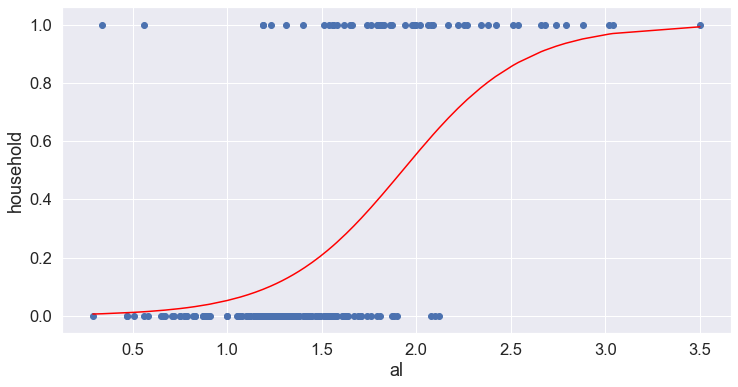

In [ ]:
# plot the predicted probabilities again
plt.figure(figsize=(12,6))

plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household');

### Interpretation of coeff

(1). calculate the log of odds

In [ ]:
logreg.intercept_

array([-6.00934605])

In [ ]:
logreg.coef_

array([[3.11517927]])

In [ ]:
# compute predicted log-odds for al=2 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 2

print('log of odds for al = 2, ', logodds)

# find out the prob
# odds = np.exp(logodds)
# prob = odds/(1 + odds)

log of odds for al = 2,  [0.22101248]


(2). Convert log of odds to odds

$ log(odds) = n $

$ odds = e^n $

In [ ]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([1.247339])

(3). Convert odds to probability

$odds = e^n$

$\frac{p}{1 - p} = e^n$

$\frac{1 - p}{p} = \frac{1}{e^n}$

$\frac{1}{p} = 1+ \frac{1}{e^n}$

$\frac{1}{p} = \frac{1+ e^n}{e^n}$

$p = \frac{odds}{1 + odds}$

In [ ]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([0.5550293])

In [ ]:
# compute predicted probability for al=2 using the predict_proba method
print(logreg.predict_proba([[2]]))
print(logreg.predict_proba([[2]])[:, 1])

[[0.4449707 0.5550293]]
[0.5550293]


In [ ]:
# examine the coefficient for al
for i in zip(feature_cols, logreg.coef_[0]):
    print(i)

('Al', 3.1151792681570165)


### Interpretation: A 1 unit increase in 'al' is associated with a 3.1151792681570165 unit increase in the log-odds of 'household'.

In [ ]:
# increasing al by 1 (so that al=3) increases the log-odds by 2.01099
#logodds = -0.10592543 + 2.0109909641729433
logodds = logreg.intercept_ + logreg.coef_[0] * 3
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([0.96564975])

In [ ]:
# compute predicted probability for al=3 using the predict_proba method
logreg.predict_proba([[3]])

array([[0.03435025, 0.96564975]])

In [ ]:
logreg.predict_proba([[2]])

array([[0.4449707, 0.5550293]])

the probability that it will be class =1, increases from 0.47 to 0.87

__Bottom line: __
    Positive coefficients increase the log-odds of the response 
    (and thus increase the probability), 
    and negative coefficients decrease the log-odds of the response 
    (and thus decrease the probability).

In [ ]:
# examine the intercept
logreg.intercept_

Interpretation: For an 'al' value of 0, the log-odds of 'household' is -7.71.

In [ ]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

That makes sense from the plot above, because the probability of household=1 should be very low for such a low 'al' value.

In [ ]:
# examine the coefficient for al
for i in zip(feature_cols, logreg.coef_[0]):
    print(i[0], i[1], (np.exp(i[1]) -1)*100)